<a href="https://colab.research.google.com/github/miachen6/Complete-Python-3-Bootcamp/blob/master/Miao_Chen_Project1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Displaying all the features in the US_Accidents_March23_California dataset

In [ ]:
import pandas as pd

# Load US_Accidents_Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/US_Accidents_March23_California.csv')

# Displaying all the features and the first 5 rows of the dataset
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,0.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
import pandas as pd

# Load US_Accidents_Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/US_Accidents_March23_California.csv')

# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Time']

# Extract the hour from the date of Start_Time
df['Hour'] = df['Start_Time'].dt.hour
df['Hour']


,Hour
0,10
1,10
2,10
3,10
4,10
...,...
256239,18
256240,18
256241,19
256242,20


# Graphing total number of accidents by the time of the day

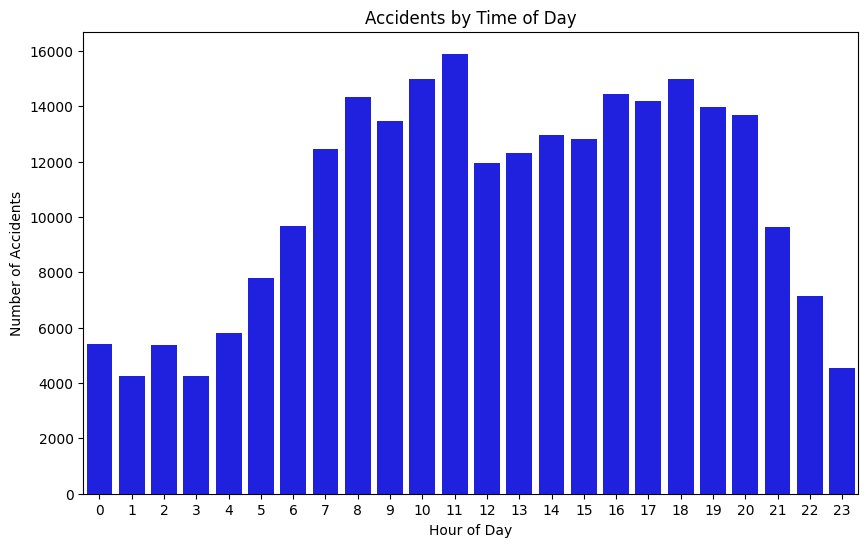

Top 5 times of the day when most accidents happen:
Hour
11    15893
18    14980
10    14969
16    14421
8     14345
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load US_Accidents_Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/US_Accidents_March23_California.csv')

# Only interested in the hours which I could get from the Start_Time
# Need to convert Start_Time to datetime to extract the hours
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract the hour of the day
df['Hour'] = df['Start_Time'].dt.hour

# Plot accidents by hour of day using histogram chart
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, color='blue')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Count the number of accidents per hour
accident_counts = df['Hour'].value_counts()

# Sort the values in descending order and select the top 5
top_5_hours = accident_counts.head(5)

# Print the top 5 hours
print("Top 5 times of the day when most accidents happen:")
print(top_5_hours)


# Graphing top 10 cities in California that have the most accidents

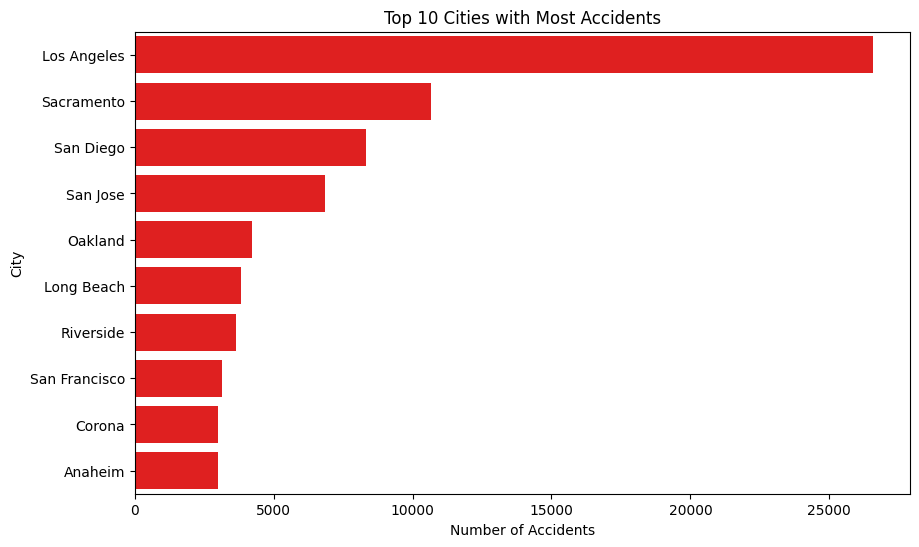

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load US_Accidents_Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/US_Accidents_March23_California.csv')

# Count the number of accidents per city
city_accidents = df['City'].value_counts()

# Select the top 10 cities
top_10_cities = city_accidents.head(10)

# Plot the top 10 cities using a horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, color='red')
plt.title('Top 10 Cities with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()

# Percentage of Accidents By Weather Conditions

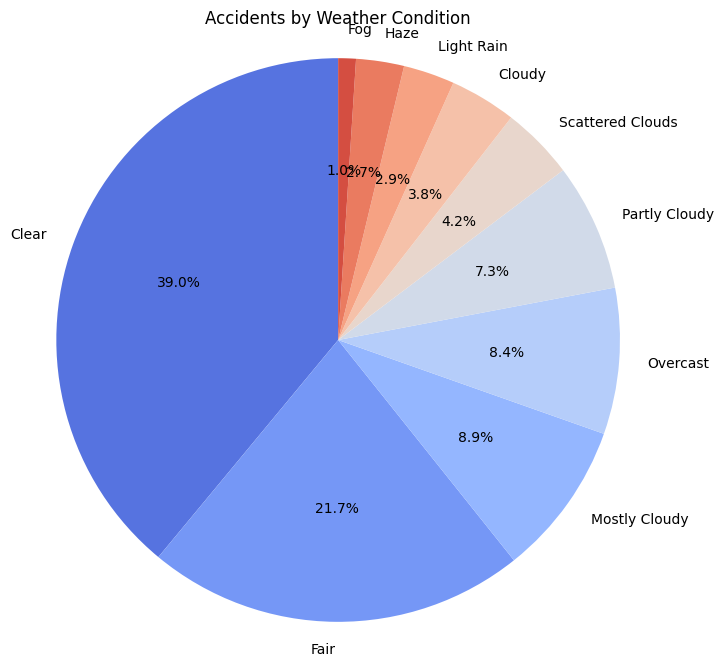

Percentage of Accidents in Each Weather Condition (Top 10):
Weather_Condition
Clear               37.527123
Fair                20.914441
Mostly Cloudy        8.545761
Overcast             8.067701
Partly Cloudy        7.035092
Scattered Clouds     4.031314
Cloudy               3.674623
Light Rain           2.830115
Haze                 2.646306
Fog                  0.975242
Name: count, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load US_Accidents_Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/US_Accidents_March23_California.csv')

# Count the number of accidents for each weather condition
weather_accidents = df['Weather_Condition'].value_counts().head(10)

# Plot the accidents by weather condition using a pie chart
plt.figure(figsize=(8,8))
plt.pie(weather_accidents.values, labels=weather_accidents.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(weather_accidents)))
plt.title('Accidents by Weather Condition')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


# Calculate the percentage of accidents for each weather condition
total_accidents = df.shape[0]
weather_percentage = (weather_accidents / total_accidents) * 100

# Print the percentages
print("Percentage of Accidents in Each Weather Condition (Top 10):")
print(weather_percentage)

# Is there a correlation between severity of the accident and the time of day?

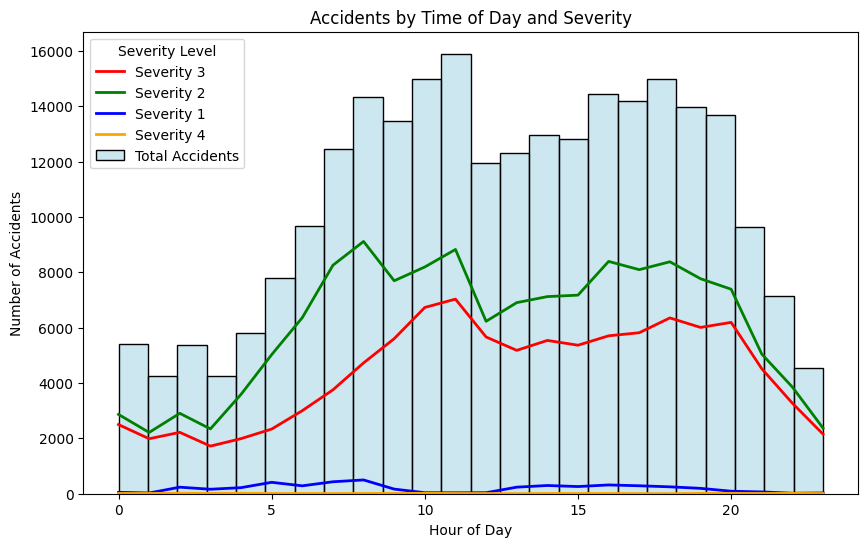

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/US_Accidents_March23_California.csv')

# Convert Start_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract the hour of the day
df['Hour'] = df['Start_Time'].dt.hour

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram of total accidents by time of day
sns.histplot(df['Hour'], bins=24, color='lightblue', kde=False, label='Total Accidents', alpha=0.6)

# Overlay line charts for accidents by severity
severity_levels = df['Severity'].unique()
colors = ['red', 'green', 'blue', 'orange']  # Adjust this to match the number of severity levels

for i, severity in enumerate(severity_levels):
    # Filter data for the specific severity level
    df_severity = df[df['Severity'] == severity]

    # Group by hour and count accidents
    hourly_accidents = df_severity.groupby('Hour').size()

    # Plot line chart for this severity
    plt.plot(hourly_accidents.index, hourly_accidents.values, color=colors[i], label=f'Severity {severity}', linewidth=2)

# Add chart details
plt.title('Accidents by Time of Day and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')

# Display legend
plt.legend(title='Severity Level')

# Show the plot
plt.show()
